# Bank Sales Dataset

## Imports

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [175]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix
)
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [177]:
import warnings
warnings.filterwarnings(action='ignore')

## Loading Dataset

In [178]:
df = pd.read_csv('Datasets/Bank Marketing (2).csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


## Explarotary Data Analysis

### Data Info

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


### Data Description

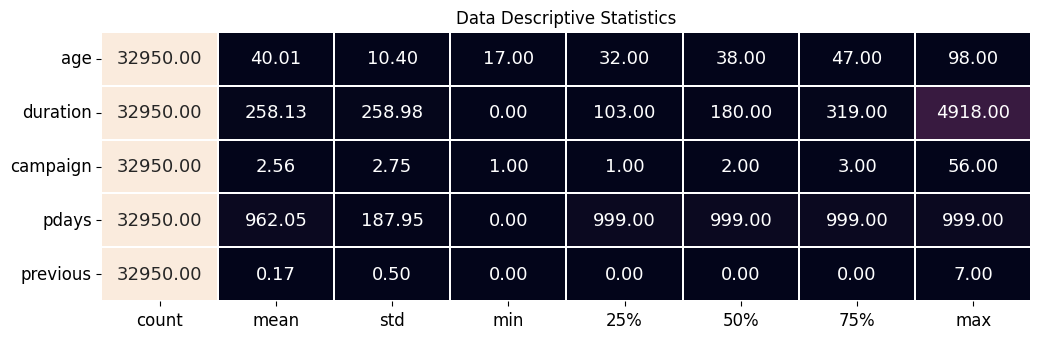

In [180]:

desc = df.describe().T
f, ax = plt.subplots(figsize=(12,
                      desc.shape[0] * 0.7))
sns.heatmap(
    data=desc,
    annot=True,
    ax = ax,
    fmt = '.2f',
    linecolor = 'white',
    linewidths = 1.2,
    cbar = False,
    annot_kws = {'size' : 13}
)
plt.yticks(size=12)
plt.xticks(size=12,
            rotation=0)
plt.title('Data Descriptive Statistics')
plt.show()

### Checking Nulls

<Figure size 1000x800 with 0 Axes>

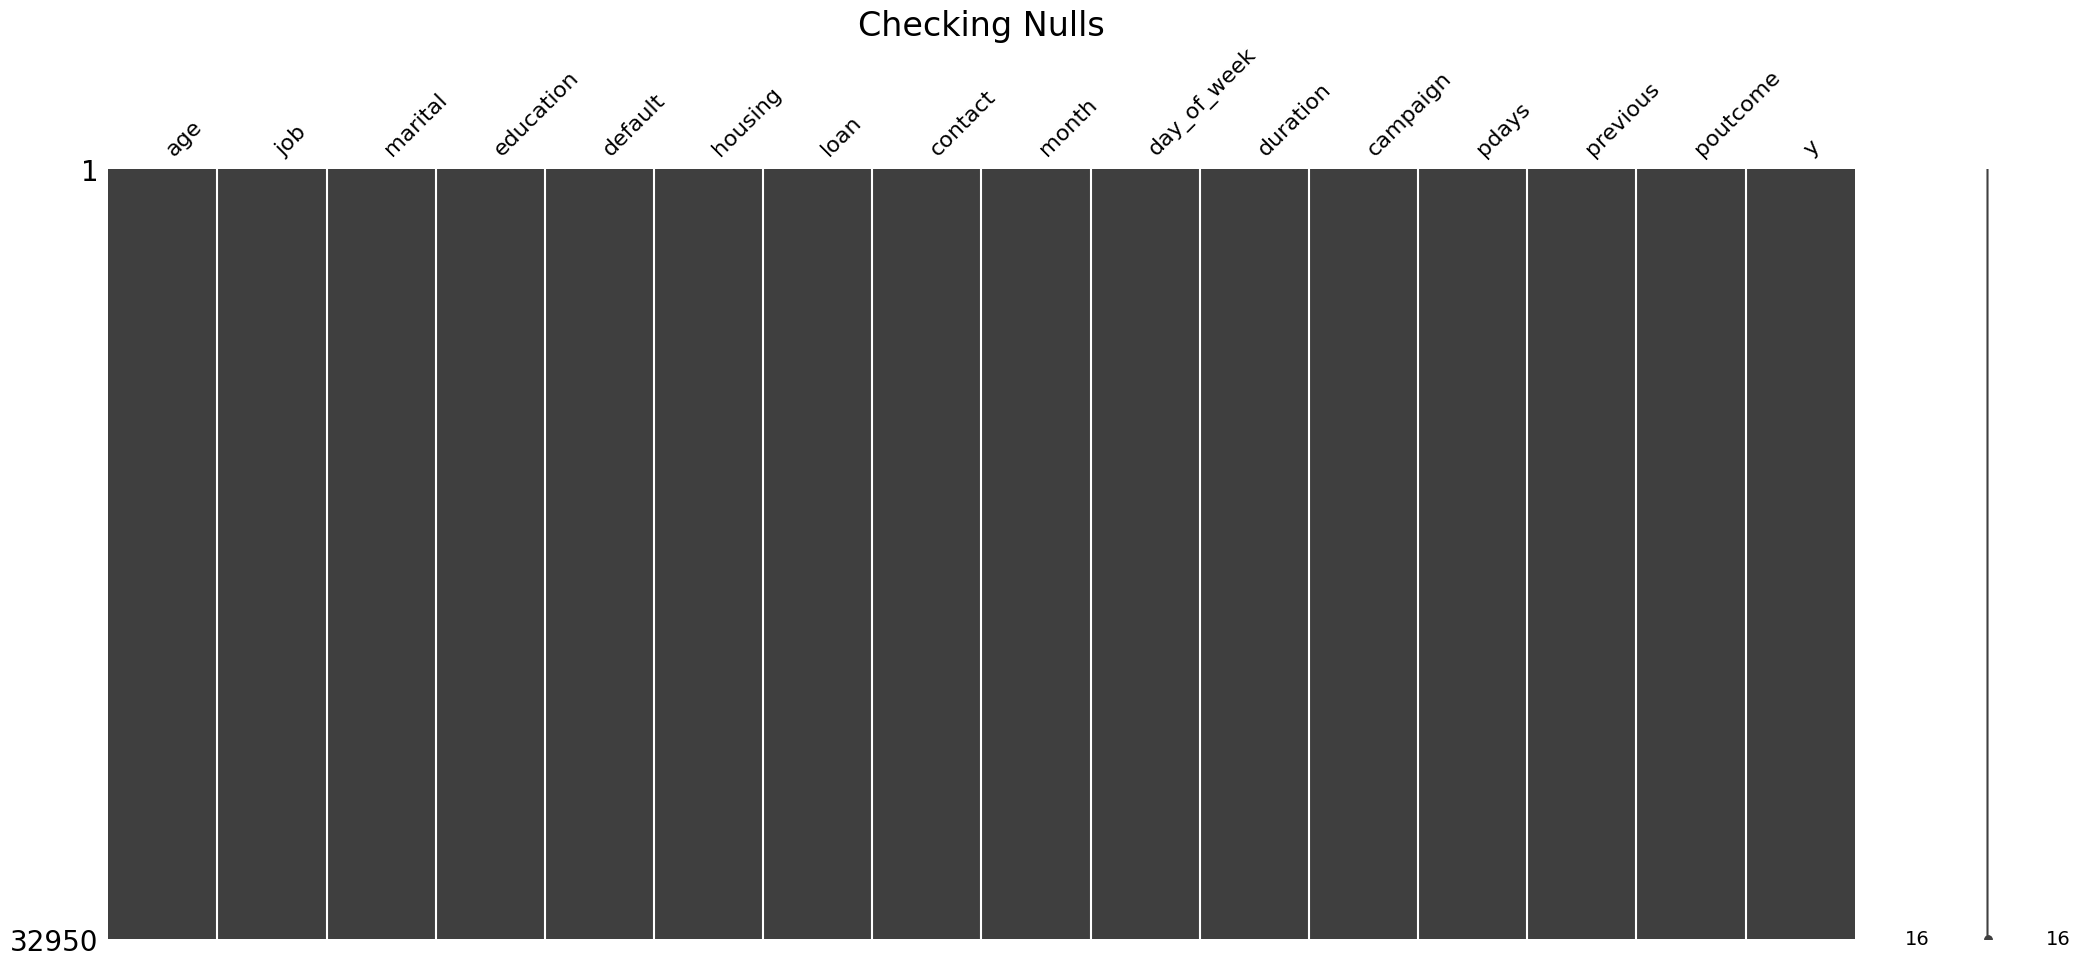

In [181]:
plt.figure(figsize=(10, 8))
msno.matrix(df)
plt.title('Checking Nulls', size=24)
plt.show()

### Checking Duplicates

In [182]:
df.duplicated().sum()

np.int64(8)

In [183]:
df.drop_duplicates(inplace=True)

In [184]:
df.shape

(32942, 16)

### Checking Categorical Features' Distribution

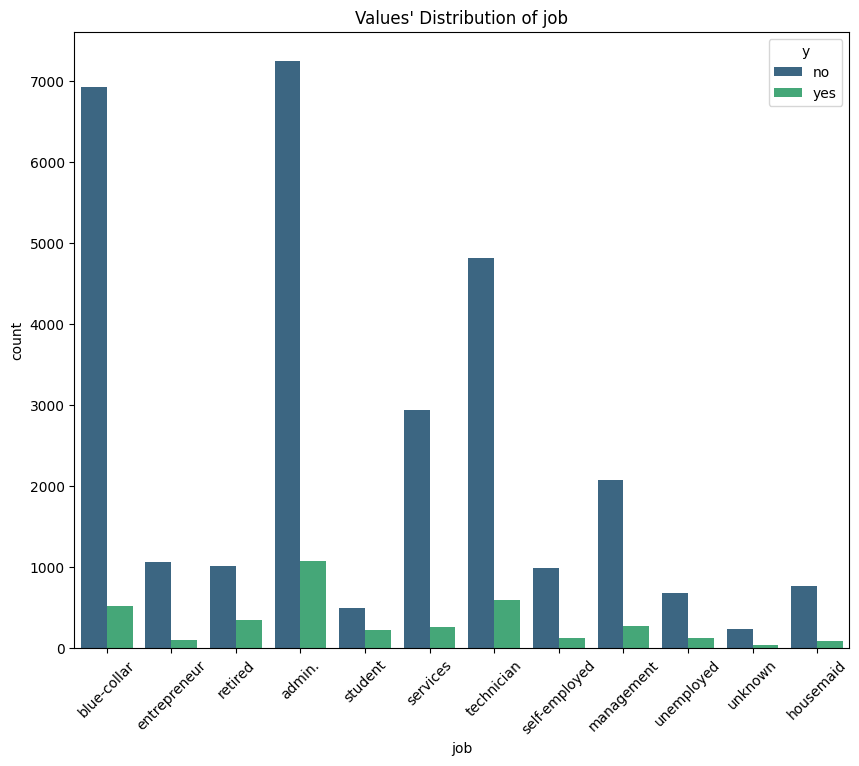

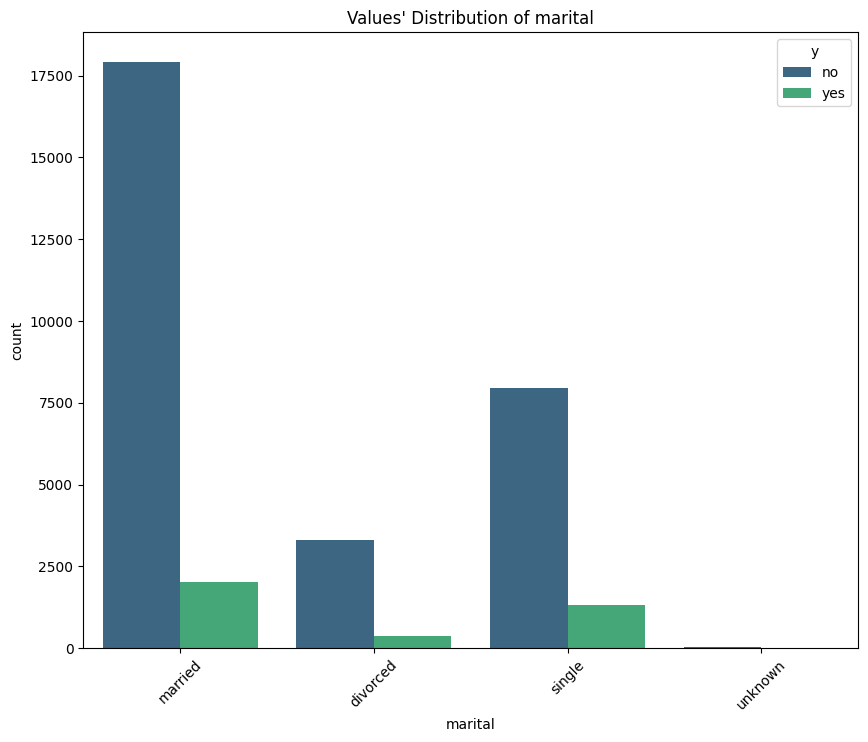

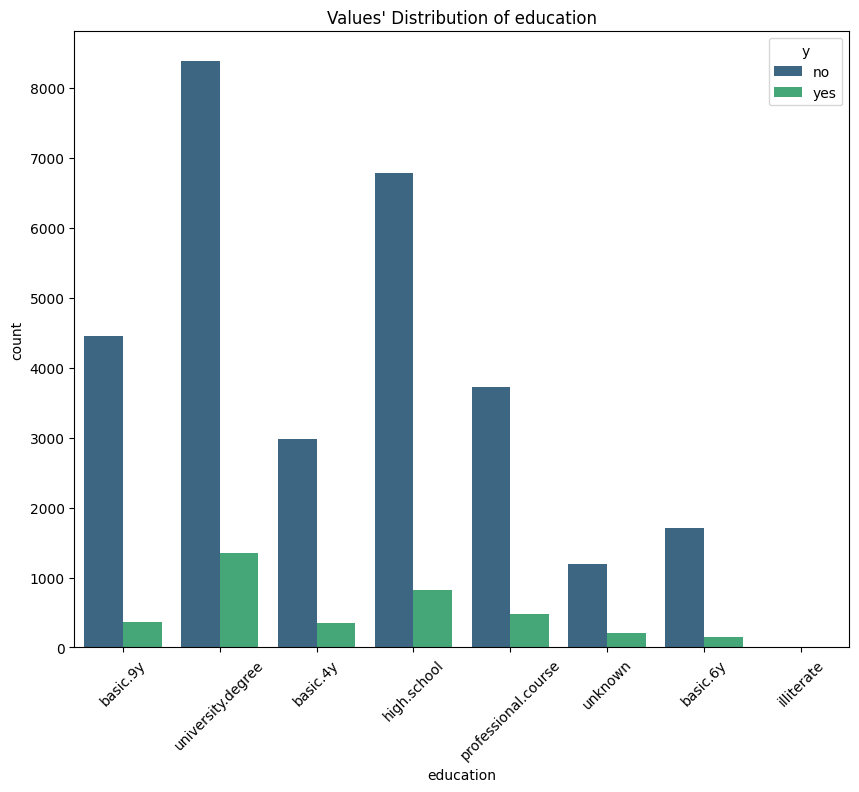

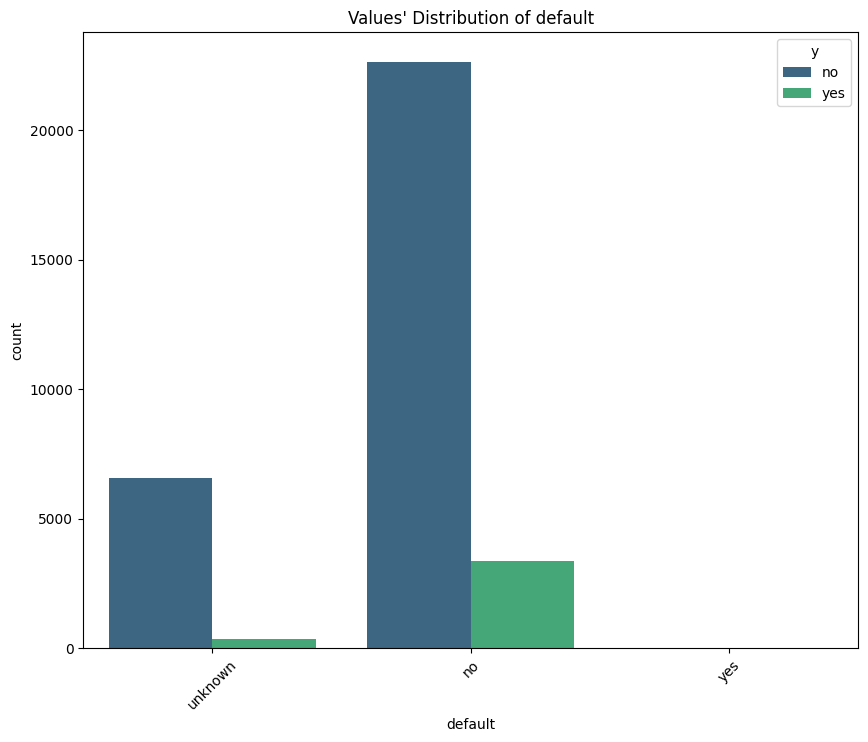

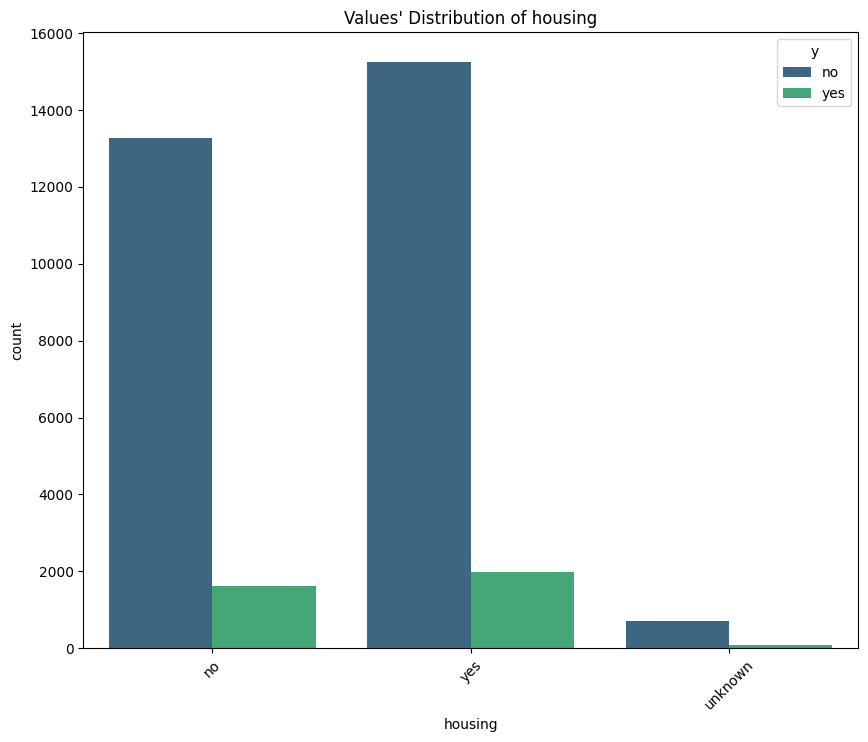

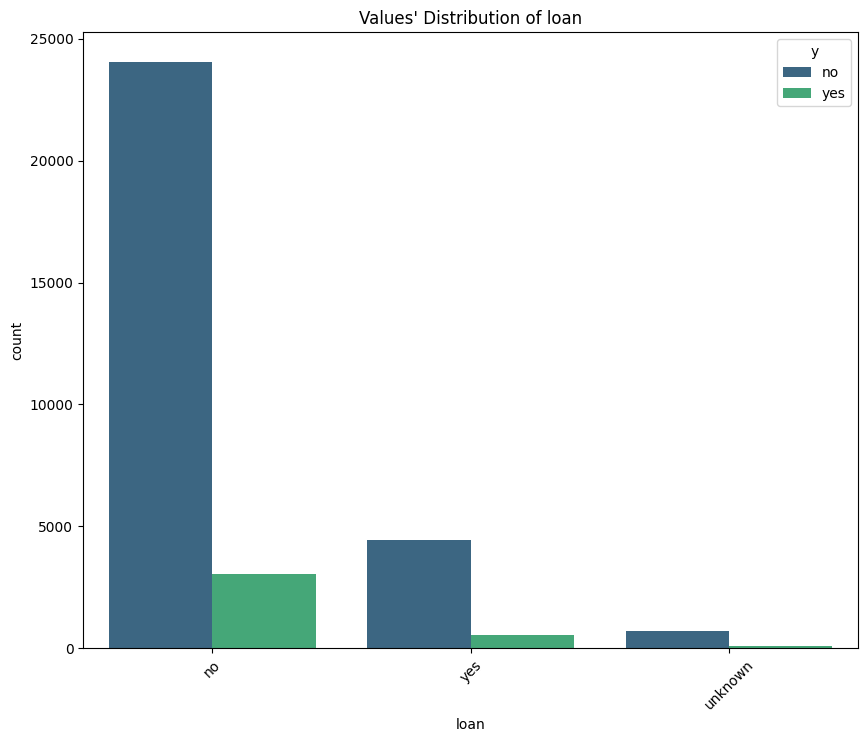

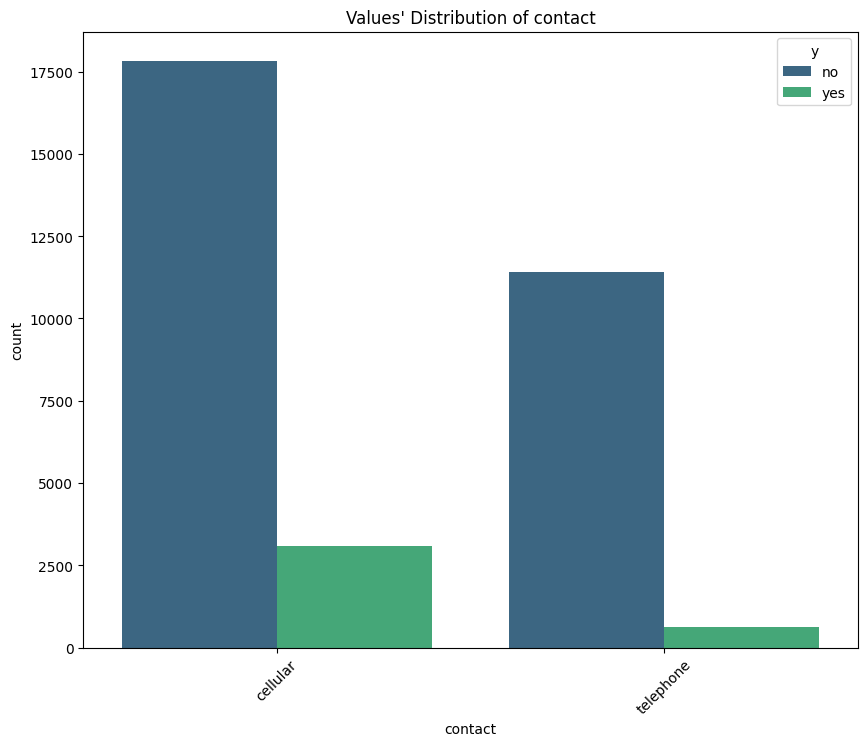

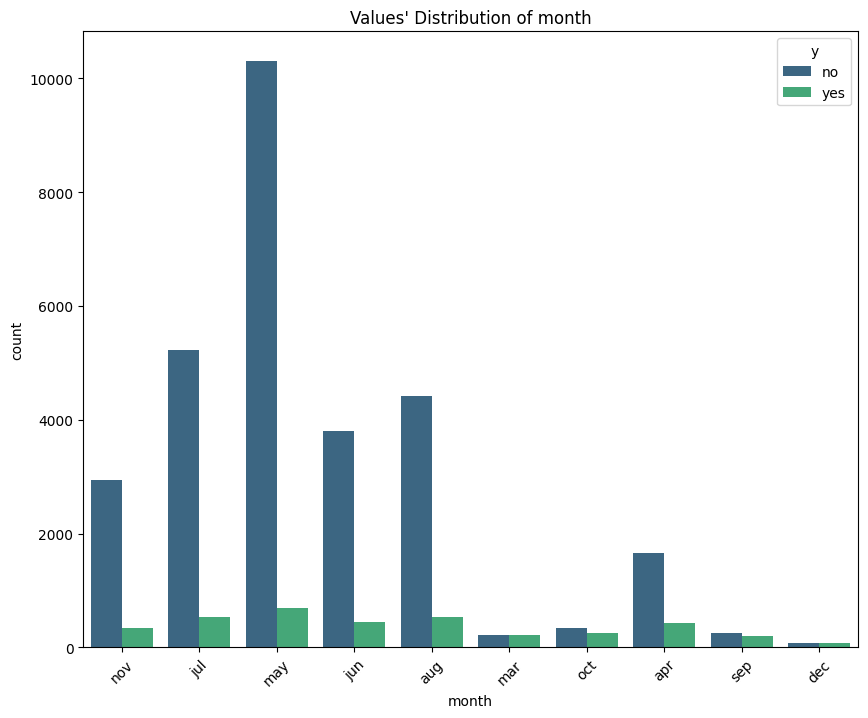

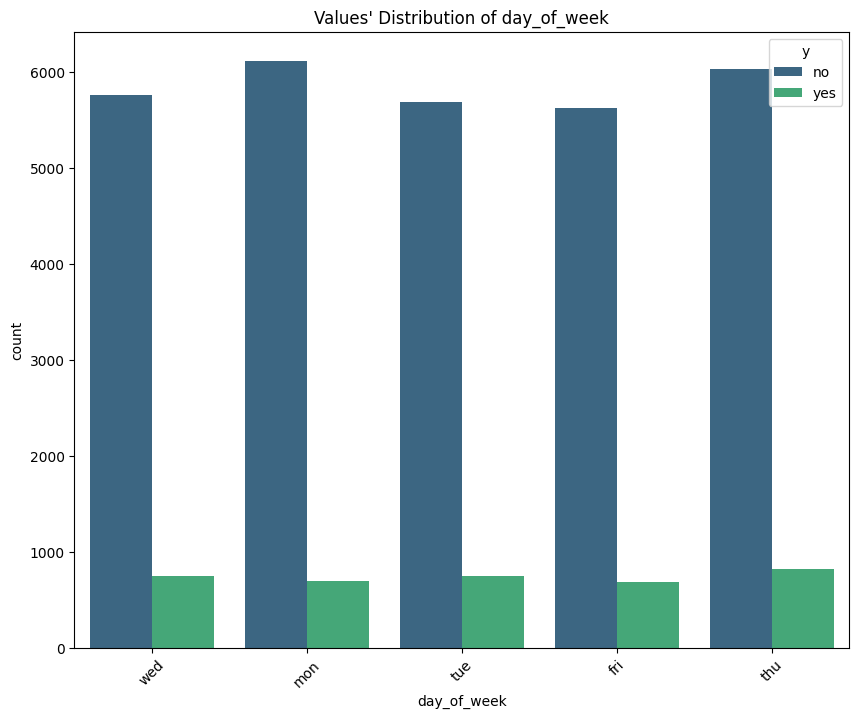

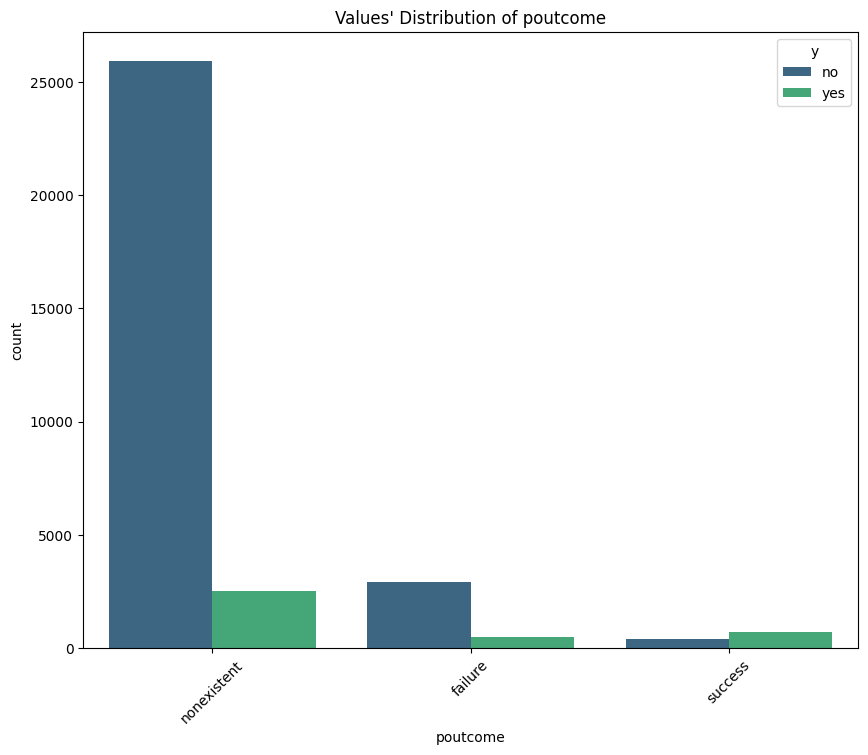

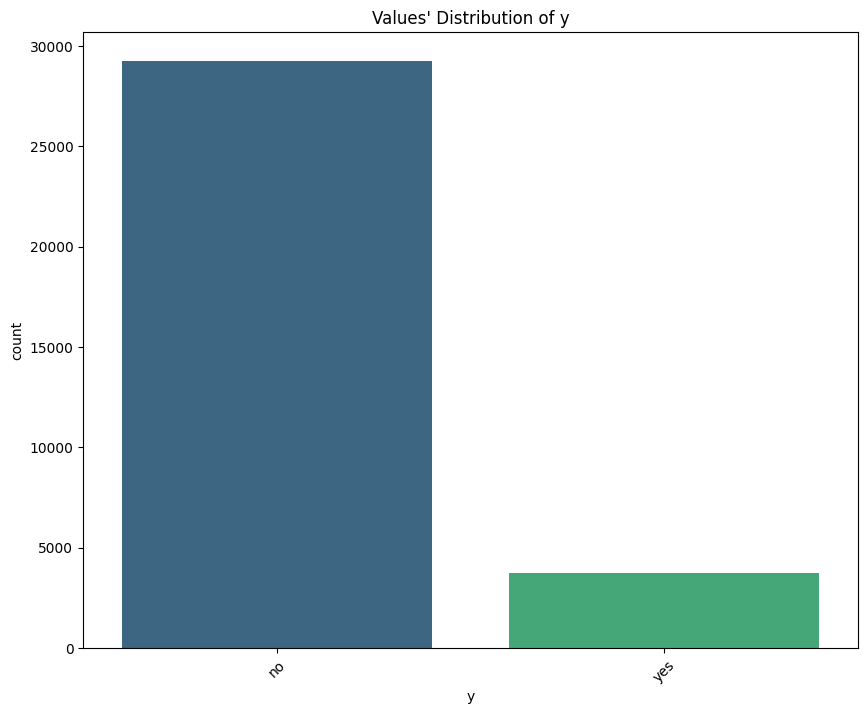

In [185]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
  plt.figure(figsize=(10, 8))
  plt.title(f"Values' Distribution of {col}")
  sns.countplot(data=df,
                x=col,
                hue=df['y'],
                palette='viridis')
  plt.xticks(rotation=45)
  plt.show()
  print('\n')

### Pairplot

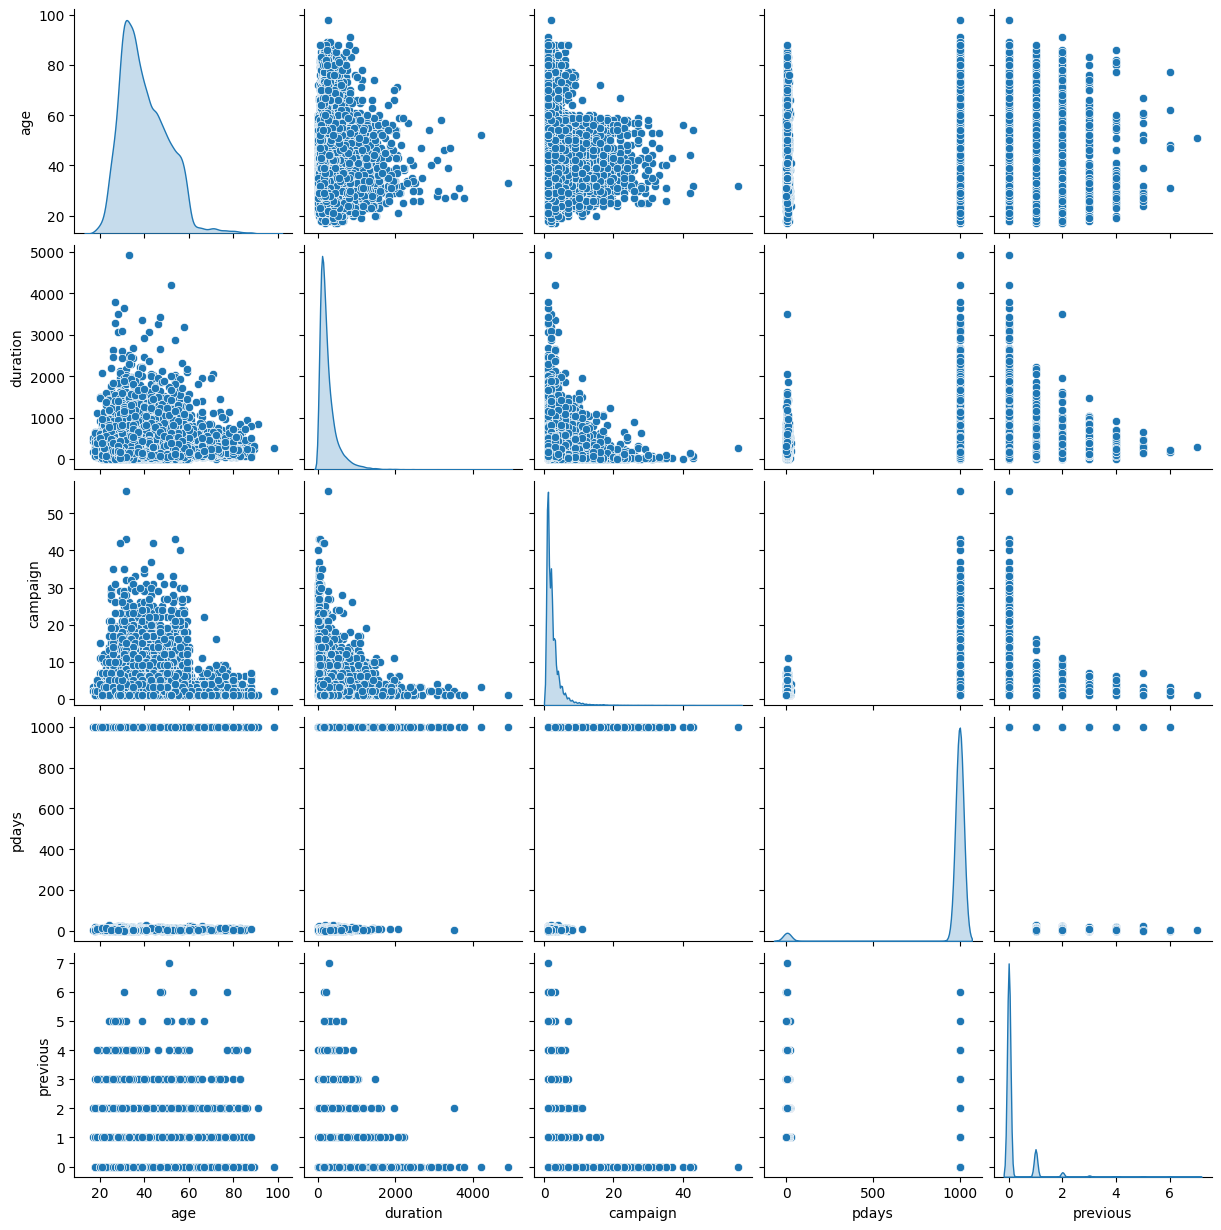

In [186]:
sns.pairplot(df,
             diag_kind='kde')
plt.show()

### Checking Outliers

### Correlation

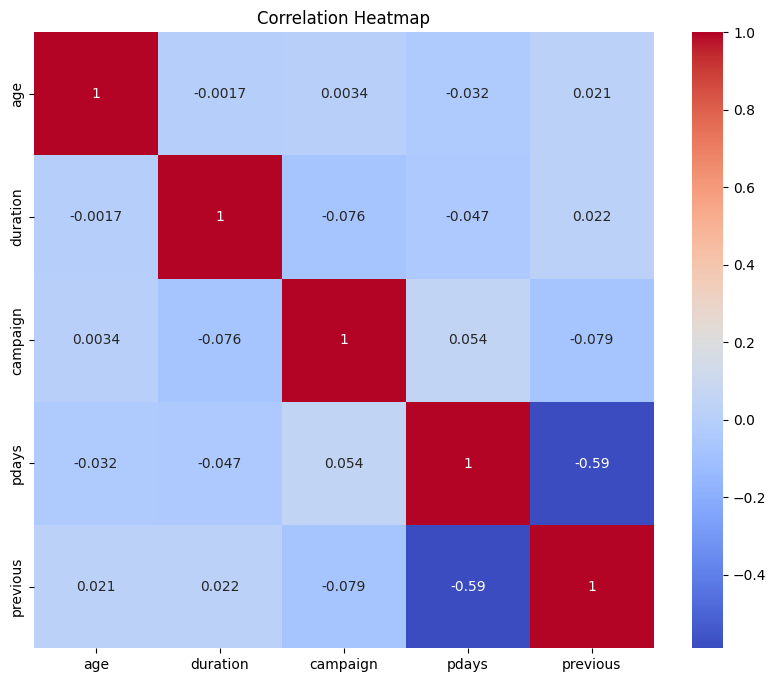

In [187]:
df_correlation_heatmap = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(df_correlation_heatmap, cmap='coolwarm', annot=True)
plt.show()

**Relationship between `pdays` and `previous`**

- `pdays`: Number of days since the client was last contacted in a previous campaign (999 means never contacted).  
- `previous`: Number of contacts performed before this campaign (in previous campaigns).  

There is a **moderate negative correlation (~ -0.59)** between `pdays` and `previous`.  
👉 This means that the more times a client has been contacted before, the fewer the days since the last contact.  
In other words, **frequent contacts (higher `previous`) usually imply more recent interactions (lower `pdays`)**.


### Dropping Uninformative Features

**`Duration`**\
To be dropped as it is highly predictive, and used for benchmarking

In [188]:
df.drop('duration', axis=1, inplace=True)

**`poutcome`**

In [189]:
nonexistent_count = (df['poutcome'] == 'nonexistent').sum()
print(f"Percentage of 'nonextistent' in poutcome: ", nonexistent_count / df['poutcome'].shape[0])

Percentage of 'nonextistent' in poutcome:  0.8623641551818347


In [190]:
nonexistent_count = (df['poutcome'] == 'nonexistent').sum()
nonexistent_precentage = nonexistent_count / df.shape[0]
print(f"Percentage of 'nonextistent' in poutcome: ", nonexistent_precentage)

failure_count = (df['poutcome'] == 'failure').sum()
failure_precentage = failure_count / df.shape[0]
print(f"Percentage of 'failure' in poutcome: ", failure_precentage)

success_count = (df['poutcome'] == 'success').sum()
success_precentage = success_count / df.shape[0]
print(f"Percentage of 'success' in poutcome: ", success_precentage)

Percentage of 'nonextistent' in poutcome:  0.8623641551818347
Percentage of 'failure' in poutcome:  0.10409204055612896
Percentage of 'success' in poutcome:  0.033543804262036306


* 86% of poutcome is `nonexistent`
* 10% of poutccome is `failure`
* Only 3% of poutcome is `success`

**Conclusion**: The feature is highly biased and therefore it will be dropped

In [191]:
df.drop('poutcome', axis=1, inplace=True)

`pdays`

In [192]:
not_contacted = (df['pdays'] == 999).sum()
contacted = (df['pdays'] != 999).sum()

print("Percentage of '999' in pdays: ", not_contacted / df.shape[0])
print("Percentage of not '999' in pdays: ", contacted / df.shape[0])

Percentage of '999' in pdays:  0.9627830732803109
Percentage of not '999' in pdays:  0.03721692671968915


* 96% of pdays is `999`
* Around 4% of pdays is not `999`

**Conclusion**\
The feature is highly biased and it's best to be dropped

In [193]:
df.drop('pdays', axis=1, inplace=True)

## Preprocessing

### Handling Outliers

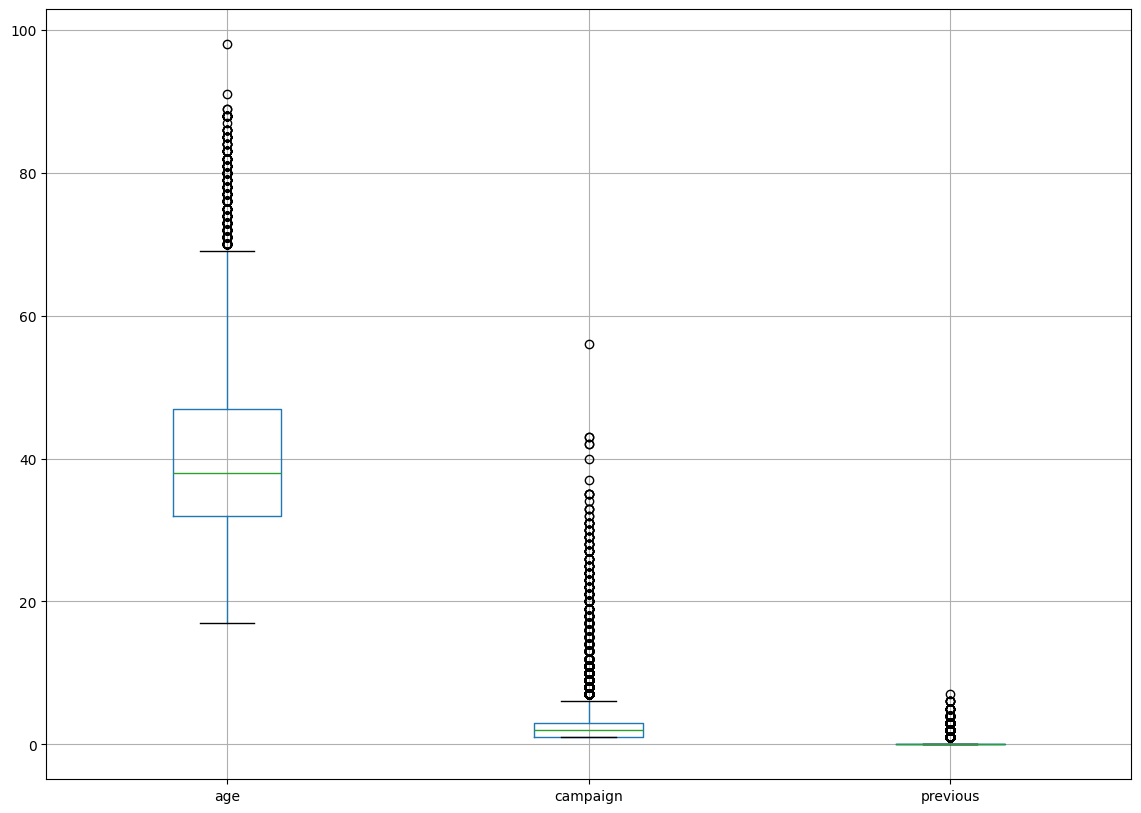

In [194]:
plt.figure(figsize=(14, 10))
df.boxplot()
plt.show()

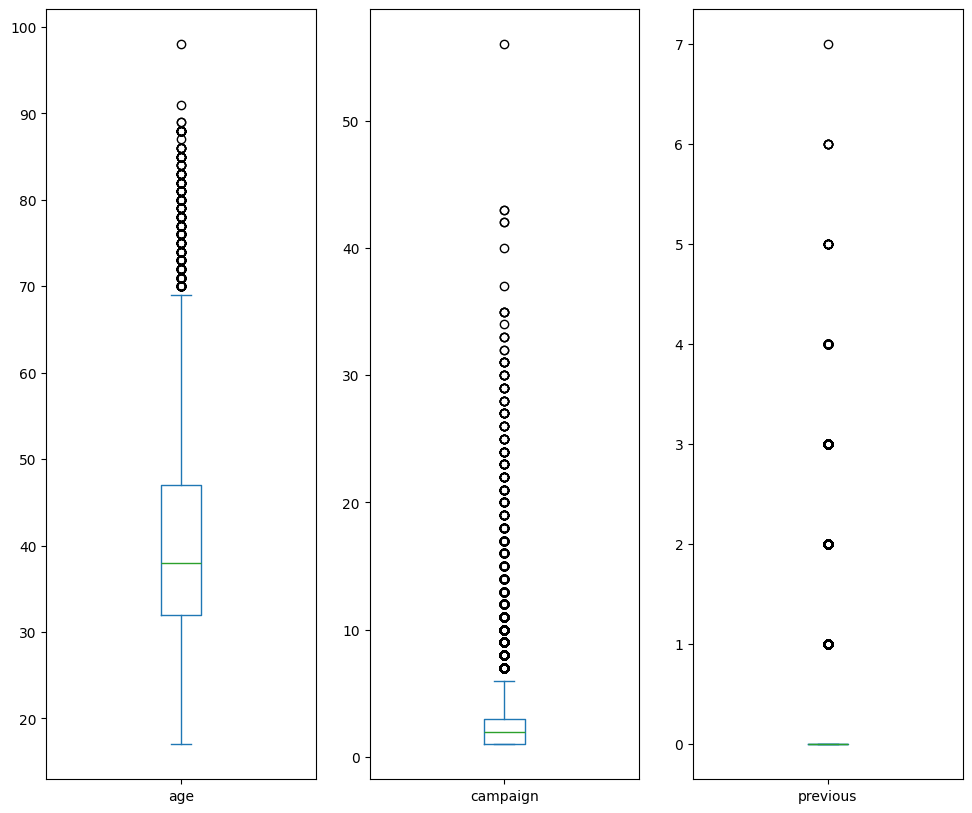

In [195]:
df.plot(kind='box', subplots=True, figsize=(16, 10), layout=(1, 4))
plt.show()

**`Age`**

In [196]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [197]:
print("Ratio of outliers in 'Age':", outliers.shape[0] / df.shape[0])

Ratio of outliers in 'Age': 0.01114079290874871


In [198]:
# Remove 'Age' Outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

**`Campaign`**

In [199]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['campaign'] < lower_bound) | (df['campaign' ] > upper_bound)]

In [200]:
print("Ratio of outliers in 'Campaign': ", outliers.shape[0] / df.shape[0])

Ratio of outliers in 'Campaign':  0.058449731389102075


In [201]:
# Remove 'Camgpaign' Outeliers
df = df[(df['campaign'] >= lower_bound) & (df['campaign'] <= upper_bound)]

**`previous`**\
If outliers were to be removed 0 will be the only value in the feature

In [202]:
display((df['previous'] == 0).sum() / df.shape[0])

np.float64(0.8598024192233706)

In [203]:
df.shape

(30671, 13)

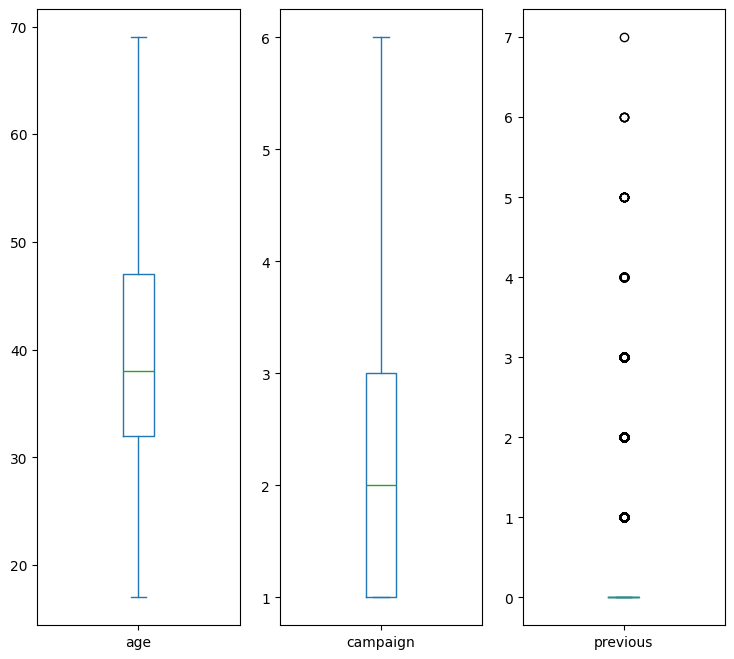

In [204]:
df.plot(kind='box', subplots=True, figsize=(12, 8), layout=(1, 4))
plt.show()

### Encoding

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30671 entries, 0 to 32949
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          30671 non-null  int64 
 1   job          30671 non-null  object
 2   marital      30671 non-null  object
 3   education    30671 non-null  object
 4   default      30671 non-null  object
 5   housing      30671 non-null  object
 6   loan         30671 non-null  object
 7   contact      30671 non-null  object
 8   month        30671 non-null  object
 9   day_of_week  30671 non-null  object
 10  campaign     30671 non-null  int64 
 11  previous     30671 non-null  int64 
 12  y            30671 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.3+ MB


In [206]:
df.nunique()

age            53
job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
campaign        6
previous        8
y               2
dtype: int64

In [207]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'y'],
      dtype='object')

**One-hot Encoding**

In [208]:
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week'])

**Label Encoding**

In [209]:
label_enc = preprocessing.LabelEncoder()

df_encoded['y'] = label_enc.fit_transform(df_encoded['y']) # 0 -> no, 1 -> yes
df_encoded['contact'] = label_enc.fit_transform(df_encoded['contact']) # 0 -> cellular, 1 -> telephone

In [210]:
label_enc.classes_

array(['cellular', 'telephone'], dtype=object)

In [211]:
pd.set_option('display.max_columns', None)

In [212]:
df_encoded.head()

,age,contact,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,49,0,4,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,37,1,2,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,36,1,2,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
4,59,0,2,0,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
5,29,0,2,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


**Handling `Unknown` Values**

In [213]:
unknowns = ['job_unknown', 'marital_unknown', 'education_unknown', 'default_unknown', 'housing_unknown', 'loan_unknown']
df_encoded.drop(columns=unknowns, inplace=True)

In [214]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30671 entries, 0 to 32949
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            30671 non-null  int64
 1   contact                        30671 non-null  int64
 2   campaign                       30671 non-null  int64
 3   previous                       30671 non-null  int64
 4   y                              30671 non-null  int64
 5   job_admin.                     30671 non-null  bool 
 6   job_blue-collar                30671 non-null  bool 
 7   job_entrepreneur               30671 non-null  bool 
 8   job_housemaid                  30671 non-null  bool 
 9   job_management                 30671 non-null  bool 
 10  job_retired                    30671 non-null  bool 
 11  job_self-employed              30671 non-null  bool 
 12  job_services                   30671 non-null  bool 
 13  job_student          

In [215]:
df_encoded.shape

(30671, 47)

### X, y split

In [216]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

### Handling Imbalance

In [230]:
yes_count = (df['y'] == 'yes').sum()
no_count = (df['y'] == 'no').sum()

total_count = len(df)

percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100

print("Percentage of 'yes' in 'y': ", percentage_yes)
print("Percentage of 'no' in 'y': ", percentage_no)

Percentage of 'yes' in 'y':  11.26471259495941
Percentage of 'no' in 'y':  88.7352874050406


In [231]:
smote = SMOTE(random_state=42, sampling_strategy=0.6)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [232]:
data_resampled = pd.concat([X_resampled, y_resampled.rename_axis('y')], axis=1)
data_resampled

,age,contact,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y
0,49,0,4,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0
1,37,1,2,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0
2,36,1,2,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,0
3,59,0,2,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,0
4,29,0,2,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43540,40,0,5,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1
43541,51,0,2,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1
43542,33,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1
43543,48,0,1,2,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,1


In [233]:
yes_resampled_count = (data_resampled['y'] == 1).sum()
no_resampled_count = (data_resampled['y'] == 0).sum()

total_count = len(data_resampled)

yes_resampled_percentage = (yes_resampled_count / total_count) * 100
no_resampled_percentage = (no_resampled_count / total_count) * 100

print("Percentage of 'yes' in y resampled: ", yes_resampled_percentage)
print("Percentage of 'no' in y resampled: ", no_resampled_percentage)

Percentage of 'yes' in y resampled:  37.499138821908375
Percentage of 'no' in y resampled:  62.500861178091625


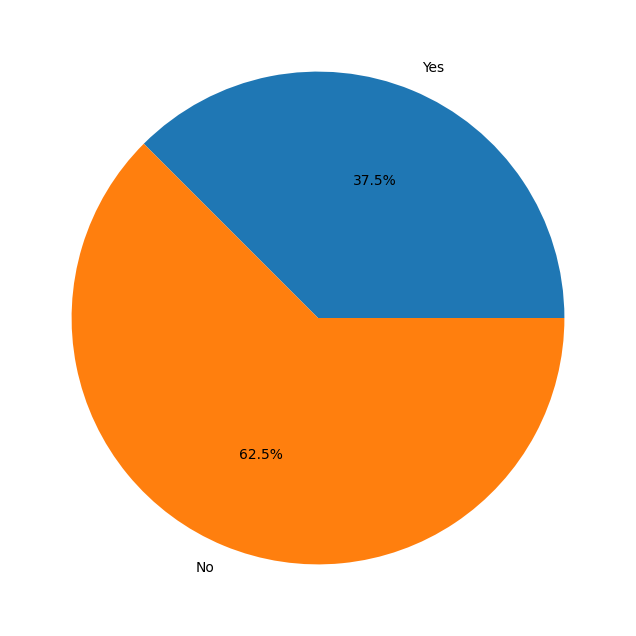

In [234]:
labels = ['Yes', 'No']
values = [yes_resampled_percentage, no_resampled_percentage]

plt.figure(figsize=(12, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis=('equal')
plt.show()

### Scaling

**Standard Scaler**

In [222]:
std = preprocessing.StandardScaler()

X_std = std.fit_transform(X_resampled)

**Robust Scaler**

In [223]:
rob = preprocessing.RobustScaler()

X_std = std.fit_transform(X_resampled)

### PCA

In [224]:
pca = PCA(n_components=34)

X_pca = pca.fit_transform(X_std)

In [225]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.061497   0.04663505 0.04175771 0.03893971 0.03795758 0.03481115
 0.03381858 0.03023709 0.02941592 0.02847579 0.0276695  0.0269643
 0.02658169 0.02641624 0.0255077  0.02469273 0.02372375 0.02328895
 0.02315854 0.02291931 0.02265729 0.0222898  0.02206484 0.02192334
 0.02167131 0.02153175 0.02138806 0.02109226 0.02079947 0.0198233
 0.01866347 0.0182807  0.01759504 0.01713178]
0.9213807180450332


### Train/Test split

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)

In [254]:
print("X's shapes: ", X_train.shape, X_test.shape)

X's shapes:  (34836, 34) (8709, 34)


In [255]:
print("y's shapes: ", y_train.shape, y_test.shape)

y's shapes:  (34836,) (8709,)


## Modeling

### Logistic Regression

In [259]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
    'class_weight' :['None', 'balanced']
}

log_grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

log_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
                         'class_weight': ['None', 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [260]:
print("Best Hyperparameters: ", log_grid.best_params_)
print("Best Score: ", log_grid.best_score_)

Best Hyperparameters:  {'C': 2, 'class_weight': 'balanced', 'penalty': 'l2'}
Best Score:  0.6466236465235762


In [261]:
log = LogisticRegression(C=2,
                         class_weight='balanced',
                         penalty='l2')

In [262]:
log.fit(X_train, y_train)

LogisticRegression(C=2, class_weight='balanced')

In [263]:
print("Train Metrics")
y_pred_train = log.predict(X_train)

acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)


print("Test Metrics")
y_pred = log.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)

Train Metrics
Accuracy:  0.7149500516706855
Precision:  0.6033515867256053
Recall:  0.7000688968843298
F1-Score:  0.6481218993621545
Test Metrics
Accuracy:  0.7098403949936847
Precision:  0.5980366144866012
Recall:  0.6901408450704225
F1-Score:  0.6407960199004975


### KNN

In [ ]:
param_grid = {
    'n_neighbors' : [i for i in range (1, 21)]
}

knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)

print("Best Parameters: ", knn_grid.best_params_)
print("Best Score: ", knn_grid.best_score_)

Best Parameters:  {'n_neighbors': 2}
Best Score:  0.8831093549597521


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

**Evaluation**

In [ ]:
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)

Accuracy:  0.8868986106326788
Precision:  0.9071760085683684
Recall:  0.7780159216166564
F1-Score:  0.8376462831712543


### SVM

In [ ]:
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.001, 0.0001, 'scale', 'auto'],
    'kernel' : ['linear', 'poly', 'rbf'],
    'class_weight' : ['balanced']
}

In [ ]:
svm_rs = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

svm_rs.fit(X_train, y_train)

print("Best Params: ", svm_rs.best_params_)
print("Best Score: ", svm_rs.best_score_)

Best Params:  {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 1}
Best Score:  0.8958260419754801


In [ ]:
svm = SVC()

svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)

### Decision Tree

In [ ]:
param_grid={
    'max_depth' : [i for i in range (1, 21)],
    'criterion' : ['gini', 'entropy']
}

tree_rm = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [ ]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)

### Random Forest

In [ ]:
param_grid = {
    'n_estimators' : randint(100, 1000),
    'max_depth' : [None] + list(range(5, 500, 5)),
    'min_samples_split' : randint(2, 20),
    'min_samples_leaf' : randint(1, 20),
    'max_features' : ['sqrt', 'log2', None],
    'bootstrap' : [True, False]
}

rf_rs = RandomizedSearch{
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
}

print("Best Params: ", svm_rs.best_params_)
print("Best Score: ", svm_rs.best_score_)

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)

## Model Comparison